In [2]:
import pickle as pkl
import numpy as np
from itertools import chain
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

from scipy.stats import norm

from src.models.train_emos import train_emos, train_and_test_emos
from src.visualization.pit import make_cpit_diagram_emos, make_cpit_hist_emos 
from src.visualization.brier_score import make_brier_skill_plot, make_brier_plot
from src.models.get_data import get_tensors, get_normalized_tensor
from src.models.emos import EMOS
from src.visualization.scoring_tables import make_table
from src.visualization.twcrpss_plot import make_twcrpss_plot, make_twcrps_plot
from src.models.emos import EMOS
from src.visualization.reliability_diagram import make_reliability_diagram, make_reliability_diagram_sklearn, make_reliability_and_sharpness
from src.training.training import load_model
from src.visualization.plot_forecasts import plot_forecast_cdf, plot_forecast_pdf, plot_weight_mixture, plot_forecast_pdf_i

from src.training.training import train_model

2024-04-30 09:29:33.235050: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 09:29:33.261616: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 09:29:33.261640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 09:29:33.262459: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-30 09:29:33.266659: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 09:29:33.267182: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
forecast_distribution = 'distr_trunc_normal'
distribution_1 = 'distr_trunc_normal'
distribution_2 = 'distr_log_normal'

loss = 'loss_CRPS_sample' # options: loss_CRPS_sample, loss_twCRPS_sample, loss_log_likelihood

chain_function = 'chain_function_normal_cdf_plus_constant' # options: chain_function_normal_cdf, chain_function_indicator, chain_function_normal_cdf_plus_constant
chain_function_mean = 13
chain_function_std = 2
chain_function_threshold = 15 # 12 / 15
chain_function_constant = 0.05

optimizer = 'Adam'
learning_rate = 0.03
folds = [1,2]
neighbourhood_size = 11
ignore = ['229', '285', '323']
epochs = 800

samples = 100
printing = True
pretrained = True
random_init = False

all_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot', 'spatial_variance']

location_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

scale_features = ['spatial_variance']

In [3]:
tn_spatial = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init
    )

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

tn_features = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init
    )

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot', 'spatial_variance']

tn_features_spatial = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init
    )

Using default parameters for truncated normal distribution
Step: 0, Loss: 1.6684436798095703
Step: 1, Loss: 1.5983855724334717
Step: 2, Loss: 1.541295051574707
Step: 3, Loss: 1.49138605594635
Step: 4, Loss: 1.452985167503357
Step: 5, Loss: 1.4193874597549438
Step: 6, Loss: 1.3905420303344727
Step: 7, Loss: 1.3592033386230469
Step: 8, Loss: 1.3277580738067627
Step: 9, Loss: 1.295987844467163
Step: 10, Loss: 1.2653024196624756
Step: 11, Loss: 1.2370202541351318
Step: 12, Loss: 1.2082229852676392
Step: 13, Loss: 1.1808422803878784
Step: 14, Loss: 1.1557716131210327
Step: 15, Loss: 1.1350420713424683
Step: 16, Loss: 1.1144278049468994
Step: 17, Loss: 1.0961858034133911
Step: 18, Loss: 1.078198790550232
Step: 19, Loss: 1.0582330226898193
Step: 20, Loss: 1.0398865938186646
Step: 21, Loss: 1.0254793167114258
Step: 22, Loss: 1.0087376832962036
Step: 23, Loss: 0.9970942139625549
Step: 24, Loss: 0.9847508072853088
Step: 25, Loss: 0.9722788333892822
Step: 26, Loss: 0.9667502641677856
Step: 27, Lo

KeyboardInterrupt: 

In [4]:
variance_dict = {
    'tn_features': tn_features,
    'tn_features_spatial': tn_features_spatial
}

In [3]:
folder = '/net/pc200239/nobackup/users/hakvoort/models/emos/'

base_model = load_model(folder + 'trunc_normal/tn_crps__epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ln_CRPS = load_model(folder + 'log_normal/ln_crps__epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ln_M13_STD1 = load_model(folder + 'log_normal/ln_twcrps_mean13.0_std1.0_epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

gev_CRPS = load_model(folder + 'gev/gev_crps__epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

gev_M13_STD1 = load_model(folder + 'gev/gev_twcrps_mean13.0_std1.0_epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

tn_M13_STD1 = load_model(folder + 'trunc_normal/tn_twcrps_mean13.0_std1.0_epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

gev_CRPS_random = load_model(folder + 'gev/gev_crps__epochs700_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ln_CRPS_random = load_model(folder + 'log_normal/ln_crps__epochs700_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given parameters for Log Normal distribution
Using given parameters for Generalized Extreme Value distribution
Using given parameters for Generalized Extreme Value distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Generalized Extreme Value distribution
Using given parameters for Log Normal distribution


In [4]:
ln_models = {'ln_CRPS': ln_CRPS, 'ln_M13_STD1': ln_M13_STD1}

gev_models = {'gev_CRPS': gev_CRPS, 'gev_M13_STD1': gev_M13_STD1}

CRPS_models = {'ln_CRPS': ln_CRPS, 'gev_CRPS': gev_CRPS, 'gev_CRPS_random': gev_CRPS_random, 'ln_CRPS_random': ln_CRPS_random}

M13_STD1_models = {'ln_M13_STD1': ln_M13_STD1, 'gev_M13_STD1': gev_M13_STD1, 'tn_M13_STD1': tn_M13_STD1}

In [5]:
ml_tn_ln_M13_STD2_C7 = load_model(folder + 'mixture_linear/ml_tn_ln_twcrps_mean13.0_std2.0_constant0.07000000029802322_epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ml_tn_ln_M12_STD1_C40 = load_model(folder + 'mixture_linear/ml_tn_ln_twcrps_mean12.0_std1.0_constant0.4000000059604645_epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ml_tn_ln_M13_STD2_C7_R1 = load_model(folder + 'mixture_linear/ml_tn_ln_twcrps_mean13.0_std2.0_constant0.07000000029802322_epochs601_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ml_tn_ln_M13_STD2_C7_R2 = load_model(folder + 'mixture_linear/ml_tn_ln_twcrps_mean13.0_std2.0_constant0.07000000029802322_epochs602_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ml_tn_ln_M13_STD2_C7_R3 = load_model(folder + 'mixture_linear/ml_tn_ln_twcrps_mean13.0_std2.0_constant0.07000000029802322_epochs603_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ml_tn_ln_M12_STD1_C40_R1 = load_model(folder + 'mixture_linear/ml_tn_ln_twcrps_mean12.0_std1.0_constant0.4000000059604645_epochs601_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ml_tn_ln_M12_STD1_C40_R2 = load_model(folder + 'mixture_linear/ml_tn_ln_twcrps_mean12.0_std1.0_constant0.4000000059604645_epochs602_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ml_tn_ln_M12_STD1_C40_R3 = load_model(folder + 'mixture_linear/ml_tn_ln_twcrps_mean12.0_std1.0_constant0.4000000059604645_epochs603_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ml_tn_ln_CRPS = load_model(folder + 'mixture_linear/ml_tn_ln_crps__epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

m_tn_ln_M12_STD1_C40 = load_model(folder + 'mixture/m_tn_ln_twcrps_mean12.0_std1.0_constant0.4000000059604645_epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

m_tn_ln_M13_STD2_C7 = load_model(folder + 'mixture/m_tn_ln_twcrps_mean13.0_std2.0_constant0.07000000029802322_epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal 

In [6]:
ml_tn_gev_M13_STD2_C7 = load_model(folder + 'mixture_linear/ml_tn_gev_twcrps_mean13.0_std2.0_constant0.07000000029802322_epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

ml_tn_gev_M12_STD1_C40 = load_model(folder + 'mixture_linear/ml_tn_gev_twcrps_mean12.0_std1.0_constant0.4000000059604645_epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')



Using given parameters for Truncated Normal distribution
Using given parameters for Generalized Extreme Value distribution
Using given weight parameters for weights in Mixture Linear distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Generalized Extreme Value distribution
Using given weight parameters for weights in Mixture Linear distribution


In [7]:
best_models = {'ml_tn_ln_M13_STD2_C7': ml_tn_ln_M13_STD2_C7, 'ml_tn_ln_M12_STD1_C40': ml_tn_ln_M12_STD1_C40}

best_models_and_ref = {'ml_tn_ln_M13_STD2_C7': ml_tn_ln_M13_STD2_C7, 'ml_tn_ln_M12_STD1_C40': ml_tn_ln_M12_STD1_C40, 'tn_M13_STD1': tn_M13_STD1}

best_models_1 = {'ml_tn_ln_M13_STD2_C7': ml_tn_ln_M13_STD2_C7,
                  'ml_tn_ln_M13_STD2_C7_R1': ml_tn_ln_M13_STD2_C7_R1,
                    'ml_tn_ln_M13_STD2_C7_R2': ml_tn_ln_M13_STD2_C7_R2,
                    'ml_tn_ln_M13_STD2_C7_R3': ml_tn_ln_M13_STD2_C7_R3}

best_models_2 = {'ml_tn_ln_M12_STD1_C40': ml_tn_ln_M12_STD1_C40,
                  'ml_tn_ln_M12_STD1_C40_R1': ml_tn_ln_M12_STD1_C40_R1,
                    'ml_tn_ln_M12_STD1_C40_R2': ml_tn_ln_M12_STD1_C40_R2,
                    'ml_tn_ln_M12_STD1_C40_R3': ml_tn_ln_M12_STD1_C40_R3}

model_comparison = {'ml_tn_ln_M13_STD2_C7': ml_tn_ln_M13_STD2_C7,
                     'ml_tn_ln_M12_STD1_C40': ml_tn_ln_M12_STD1_C40,
                     'ml_tn_ln_CRPS': ml_tn_ln_CRPS,
                       'm_tn_ln_M12_STD1_C40': m_tn_ln_M12_STD1_C40,
                       'm_tn_ln_M13_STD2_C7': m_tn_ln_M13_STD2_C7}

other_models = {'ml_tn_gev_M13_STD2_C7': ml_tn_gev_M13_STD2_C7,
                 'ml_tn_gev_M12_STD1_C40': ml_tn_gev_M12_STD1_C40}

In [4]:
forecast_distribution = 'distr_trunc_normal'
distribution_1 = 'distr_trunc_normal'
distribution_2 = 'distr_log_normal'

loss = 'loss_CRPS_sample' # options: loss_CRPS_sample, loss_twCRPS_sample, loss_log_likelihood

chain_function = 'chain_function_normal_cdf_plus_constant' # options: chain_function_normal_cdf, chain_function_indicator, chain_function_normal_cdf_plus_constant
chain_function_mean = 13
chain_function_std = 2
chain_function_threshold = 15 # 12 / 15
chain_function_constant = 0.05

optimizer = 'Adam'
learning_rate = 0.03
folds = [1,2]
neighbourhood_size = 11
ignore = ['229', '285', '323']
epochs = 600

samples = 100
printing = True
pretrained = True
random_init = True

all_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

location_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

In [5]:
tn_CRPS_models = {}
for i in range(0,8):
    tn_CRPS_models[str(i)] = train_model(
        forecast_distribution,
        loss,
        optimizer,
        learning_rate,
        folds,
        all_features,
        location_features,
        scale_features,
        neighbourhood_size,
        ignore,
        epochs,

        chain_function = chain_function,
        chain_function_mean = chain_function_mean,
        chain_function_std = chain_function_std,
        chain_function_constant = chain_function_constant,
        chain_function_threshold = chain_function_threshold,
        samples = samples,
        printing = printing,
        distribution_1 = distribution_1,
        distribution_2 = distribution_2,
        pretrained = pretrained,
        random_init = random_init
    )

Using random initialization for Truncated Normal distribution
Step: 0, Loss: 4.685926914215088
Step: 1, Loss: 4.663476943969727
Step: 2, Loss: 4.638144016265869
Step: 3, Loss: 4.608414649963379
Step: 4, Loss: 4.576075077056885
Step: 5, Loss: 4.538037300109863
Step: 6, Loss: 4.495962142944336
Step: 7, Loss: 4.4483642578125
Step: 8, Loss: 4.395061492919922
Step: 9, Loss: 4.3348388671875
Step: 10, Loss: 4.267828941345215
Step: 11, Loss: 4.192735195159912
Step: 12, Loss: 4.111763000488281
Step: 13, Loss: 4.0245361328125
Step: 14, Loss: 3.9318318367004395
Step: 15, Loss: 3.834027051925659
Step: 16, Loss: 3.7311551570892334
Step: 17, Loss: 3.624992609024048
Step: 18, Loss: 3.5153865814208984
Step: 19, Loss: 3.404965400695801
Step: 20, Loss: 3.296027898788452
Step: 21, Loss: 3.1831536293029785
Step: 22, Loss: 3.072950601577759
Step: 23, Loss: 2.959221124649048
Step: 24, Loss: 2.850289821624756
Step: 25, Loss: 2.742544651031494
Step: 26, Loss: 2.6348941326141357
Step: 27, Loss: 2.5317540168762

In [20]:
random_init = False
tn_CRPS_models_fixed = {}
for i in range(0,8):
    tn_CRPS_models_fixed[str(i)] = train_model(
        forecast_distribution,
        loss,
        optimizer,
        learning_rate,
        folds,
        all_features,
        location_features,
        scale_features,
        neighbourhood_size,
        ignore,
        epochs,

        chain_function = chain_function,
        chain_function_mean = chain_function_mean,
        chain_function_std = chain_function_std,
        chain_function_constant = chain_function_constant,
        chain_function_threshold = chain_function_threshold,
        samples = samples,
        printing = printing,
        distribution_1 = distribution_1,
        distribution_2 = distribution_2,
        pretrained = pretrained,
        random_init = random_init
    )

Using default parameters for truncated normal distribution
Step: 0, Loss: 1.5748990774154663
Step: 1, Loss: 1.52499520778656
Step: 2, Loss: 1.480522871017456
Step: 3, Loss: 1.4433478116989136
Step: 4, Loss: 1.4104920625686646
Step: 5, Loss: 1.3835656642913818
Step: 6, Loss: 1.3551263809204102
Step: 7, Loss: 1.3280341625213623
Step: 8, Loss: 1.300547480583191
Step: 9, Loss: 1.2792361974716187
Step: 10, Loss: 1.2545143365859985
Step: 11, Loss: 1.2348483800888062
Step: 12, Loss: 1.2149631977081299
Step: 13, Loss: 1.1971139907836914
Step: 14, Loss: 1.180701732635498
Step: 15, Loss: 1.1636234521865845
Step: 16, Loss: 1.1486525535583496
Step: 17, Loss: 1.1321088075637817
Step: 18, Loss: 1.1158589124679565
Step: 19, Loss: 1.0997394323349
Step: 20, Loss: 1.0848209857940674
Step: 21, Loss: 1.070229172706604
Step: 22, Loss: 1.0588867664337158
Step: 23, Loss: 1.0494639873504639
Step: 24, Loss: 1.0362666845321655
Step: 25, Loss: 1.0267311334609985
Step: 26, Loss: 1.0169960260391235
Step: 27, Loss:

## Overview

Overview of the work of the past 2.5 weeks:

- Checked what would be the best way of estimating the variance of the distribution.

- Implemented random initialization to see if this (significantly) improves the results. 

- Tried thinking about a 'good' measure of performance.

- Implemented batching. (Not importance sampling, I have an idea on how to do this but it is not implemented yet)

- Tried finding a 'best' model.

- Worked on my proposal.




## Estimating Variance

We trained three different models. All three models are trained on the CRPS.

- tn_spatial: the variance is estimated using only the spatial variance

- tn_features: the variance is estimated only using the features (so not the spatial variance)

- th_features_spatial: the variance is estimated using the features + spatial variance

As reference model we use tn_spatial.

In [62]:
test_fold = 3
ignore = ['229', '285', '323']
X_test, y_test = get_tensors(tn_spatial.neighbourhood_size, tn_spatial.all_features, test_fold, ignore)
X_test = tn_spatial.normalize_features(X_test)

print(X_test.shape)

(7780, 6)


In [57]:
print("TN with spatial variance CRPS: ", tn_spatial.CRPS(X_test, y_test, 20000).numpy())
print("TN with features CRPS: ", tn_features.CRPS(X_test, y_test, 20000).numpy())
print("TN with features and spatial variance CRPS: ", tn_features_spatial.CRPS(X_test, y_test, 20000).numpy())

TN with spatial variance CRPS:  0.89054877
TN with features CRPS:  0.8881885
TN with features and spatial variance CRPS:  0.88598675


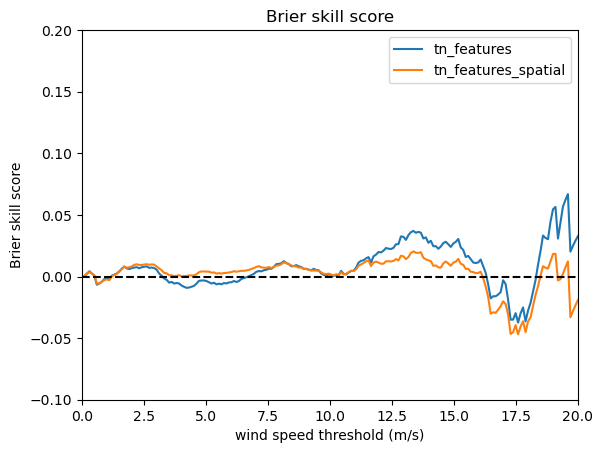

In [58]:
values = np.linspace(0, 20, 200)
ylim = [-0.1, 0.2]
make_brier_skill_plot(tn_spatial, variance_dict, X_test, y_test,values, ylim=ylim)

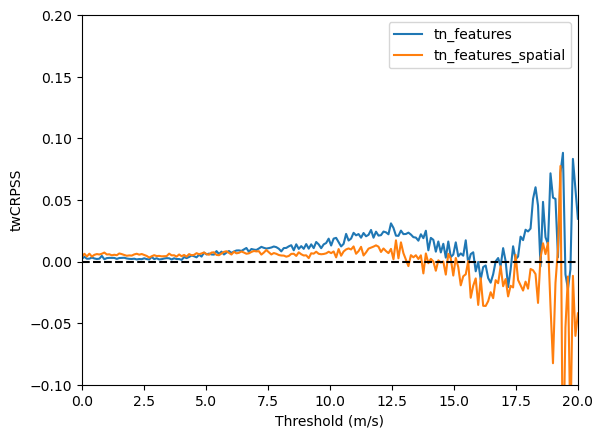

In [59]:
make_twcrpss_plot(tn_spatial, variance_dict, X_test, y_test, values, ylim=ylim)

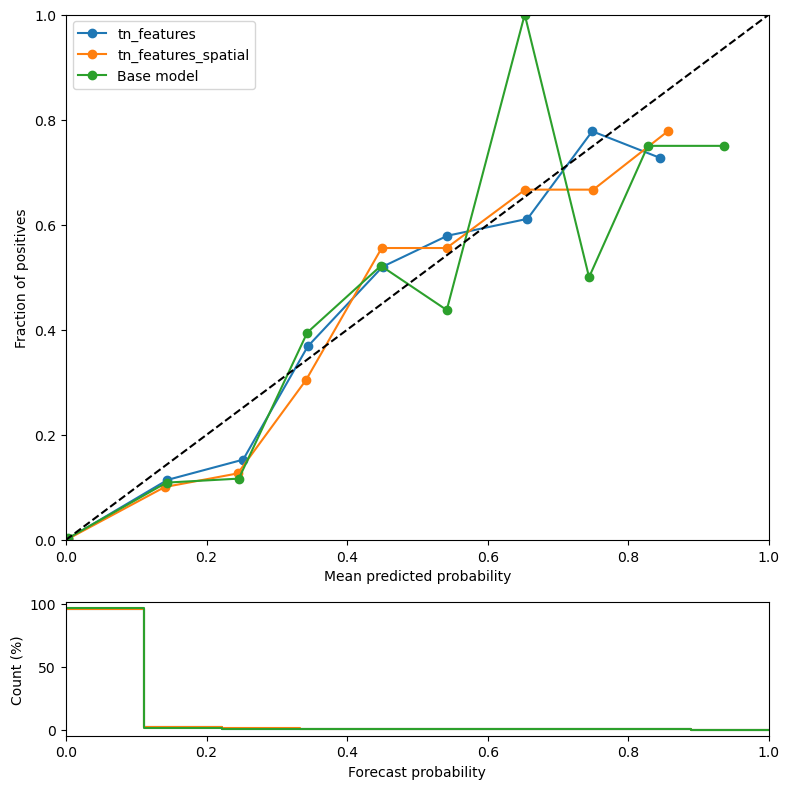

In [60]:
t = 15
make_reliability_and_sharpness(variance_dict, X_test, y_test, t, base_model=tn_spatial)

We can see that tn_features performs the best for higher wind speeds. Therefore for the rest of the results, we will use tn_features as reference model, trained with the CPRS as loss function. In case we train a model with a different distribution we use the features to estimate the variance of the distribution. I also have some results where we use the spatial variance to estimate the variance, these are similar to the results I will show now and not contained in this notebook.

I think that using the features to estimate the the variance results in the fairest comparison between using linear regression and neural networks, since neural networks are also able to use all features to determine the variance of the distribution.

## Random Initialization

I tested whether random initialization increases the performance of the models. For fixed initialization I used 0/1 to initialize the parameters, with random initialization I use samples from a standard normal distribution.

In this plot we trained 8 models with TN distribution on the CRPS with random initialization.

In [8]:
test_fold = 3
ignore = ['229', '285', '323']
X_test, y_test = get_tensors(base_model.neighbourhood_size, base_model.all_features, test_fold, ignore)
X_test = (X_test - base_model.feature_mean) / base_model.feature_std

print(X_test.shape)

(7780, 5)


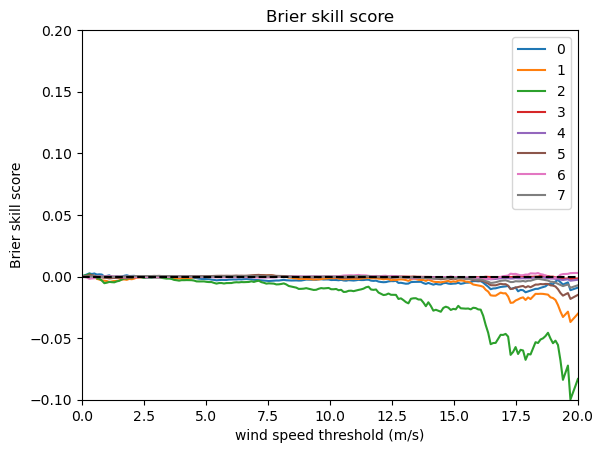

In [10]:
values = np.linspace(0, 20, 200)
ylim = [-0.1, 0.2]
make_brier_skill_plot(base_model, tn_CRPS_models, X_test, y_test, values, ylim=ylim)

And in this plot the TN is trained on the CRPS with the fixed initialization.

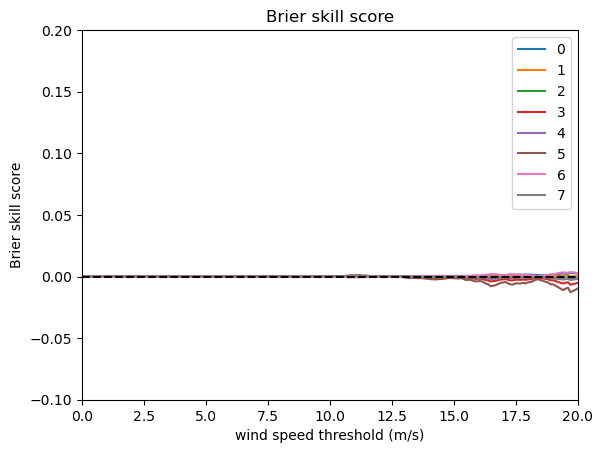

In [22]:
make_brier_skill_plot(base_model, tn_CRPS_models_fixed, X_test, y_test, values, ylim=ylim)

From these results it is possible that the performance for higher wind speeds could increase when using random initialization. However, it can also decrease. For the rest of my results I mainly used fixed initialization, to ensure the model would work reasonably well. For some models that I thought were good I also experimented with random initialization.

## Performance Measure

Regarding the measure of performance. I had the following idea:

$$\text{Score} = \text{CRPS} + \text{twCRPS}(12) + \text{twCRPS}(15)$$


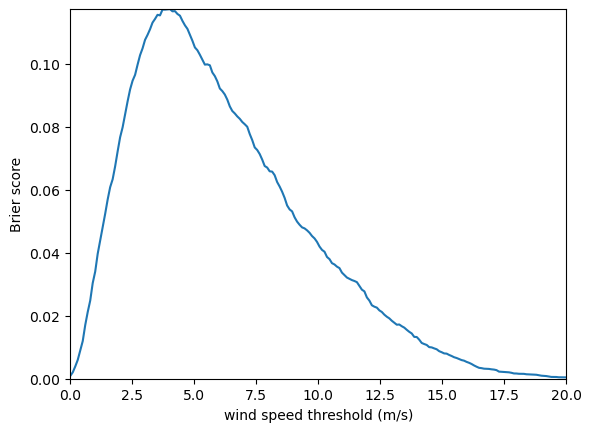

In [9]:
values = np.linspace(0, 20, 200)
make_brier_plot(base_model, X_test, y_test, values)

Sjoerd had the idea of integrating the area of different pit diagrams between the diagonal and the actual performance.

## Batching

I implemented batching, still needs work done. Question: for 1 epoch, is it best to:

- Draw with replacement per batch.

- Draw without replacement per batch.

I currently implemented with replacement. However, if I want a total of $T$ epochs with batch size $b$ and a total amount of samples $N$, I let my program take $N\cdot T/b$ random batches with replacement. This results in much slower training times because (my) python code is much slower than the C++ code in which tensorflow is written (the program has to go through my python code $N/b$ more times compared to using no batching). 

My current plan is to implement batching + importance sampling to just see which importance sampling methods work best for the training of neural networks, since I can then add the extra samples to the training set for the neural network and do the extra weighing in the score function (=> no slower python code for training neural networks).


## Finding a 'best' model

I found it fairly hard to get a 'best' set of hyperparameters, since even when training with fixed initialization the models did not always converge towards the same optimum. This is most likely because I train my models by sampling from the parametric distribution.

Another problem was that even when varying the hyperparameters, most models showed quite similar behavior.

Final problem: with my mixture linear model the weight of the distribution is determined by

$$\omega = \sigma(c_1 + c_2 X_w)$$

where $X_w$ is the predicted wind speed and $c_1,c_2$ are parameters. I always initialized $c_1=c_2=0$, hoping that the model would decide itself to use the TN for the lower wind speeds and the LN or GEV for the higher wind speeds. However this was not always the case. Most of the time the choice of which distribution to use for the higher/lower wind speeds seems random. (This could be due to the way I implemented mixture distributions?)

Regarding the choice of distribution: based on the following three plots it decided that the TN-LN combination would be the best and did most of the experimentation with the ML model with these distributions. However choosing TN-GEV gave very similar results.

Regarding the training of M or ML models: I first trained each distribution seperately for a fixed amount of steps on the specified weighted scoring rule. Then I resumed training with the M/ML model that used the parameters of the pretrained distribution, and set the weight parameters in such a way that for the first iteration it would be 1/2.

In [9]:
print("Base model CRPS: ", base_model.CRPS(X_test, y_test, 20000).numpy())
for key in CRPS_models:
    print(key, " CRPS: ", CRPS_models[key].CRPS(X_test, y_test, 20000).numpy())

Base model CRPS:  0.888078
ln_CRPS  CRPS:  0.89321643
gev_CRPS  CRPS:  0.89011365
gev_CRPS_random  CRPS:  0.88999003
ln_CRPS_random  CRPS:  0.8929501


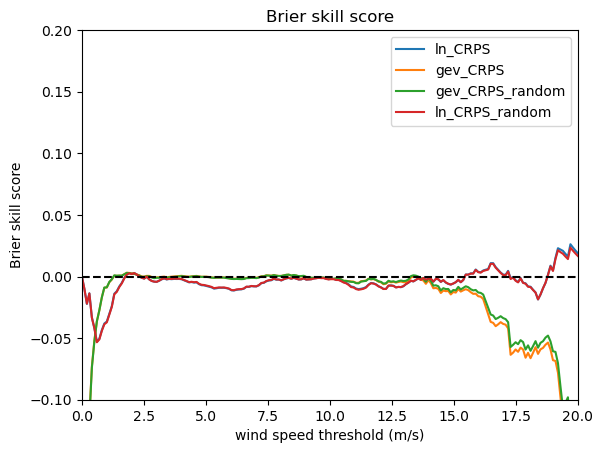

In [11]:
values = np.linspace(0,20,200)
ylim = [-0.1, 0.2]
make_brier_skill_plot(base_model , CRPS_models, X_test, y_test, values, ylim=ylim)

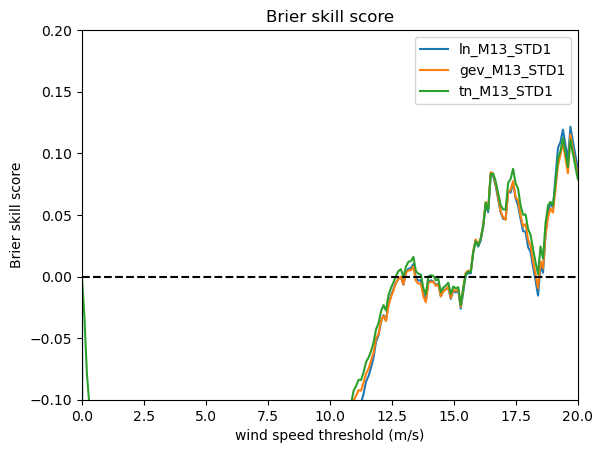

In [41]:
make_brier_skill_plot(base_model , M13_STD1_models, X_test, y_test, values, ylim=ylim)

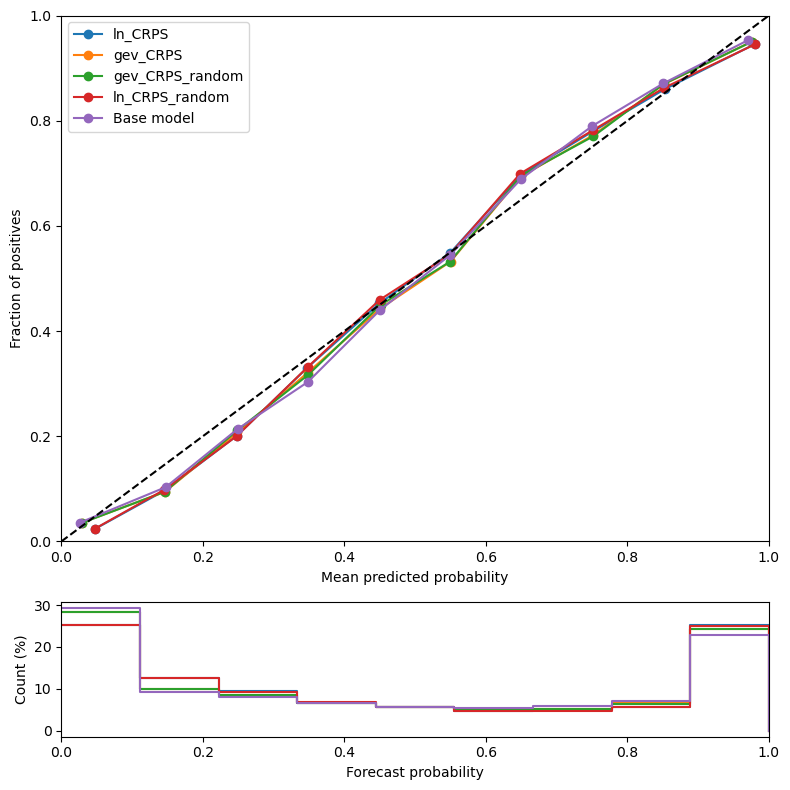

In [27]:
t = 5
make_reliability_and_sharpness(CRPS_models, X_test, y_test, t, base_model=base_model)

## Best Models

The following were some of the best models that I trained. Something that happened quite consistently was:

- Sometimes sharp decrease in BSS between 0 and 1 m/s threshold. 

- Slight decrease between 10 and 12 m/s threshold.

- Big increase between 15 and 17 m/s, then decrease followed by and even strong increase in BSS.

In [9]:
print("Base model CRPS: ", base_model.CRPS(X_test, y_test, 20000).numpy())	
for key in best_models:
    print(key, " CRPS: ", best_models[key].CRPS(X_test, y_test, 20000).numpy())

Base model CRPS:  0.8883817
ml_tn_ln_M13_STD2_C7  CRPS:  0.8859383
ml_tn_ln_M12_STD1_C40  CRPS:  0.88744146


In [26]:
print("Base model twCRPS: ", base_model.twCRPS(X_test, y_test, 12, 20000).numpy())
for key in best_models:
    print(key, " twCRPS: ", best_models[key].twCRPS(X_test, y_test, 12, 20000).numpy())

Base model twCRPS:  0.062628254
ml_tn_ln_M13_STD2_C7  twCRPS:  0.06181997
ml_tn_ln_M12_STD1_C40  twCRPS:  0.062077902


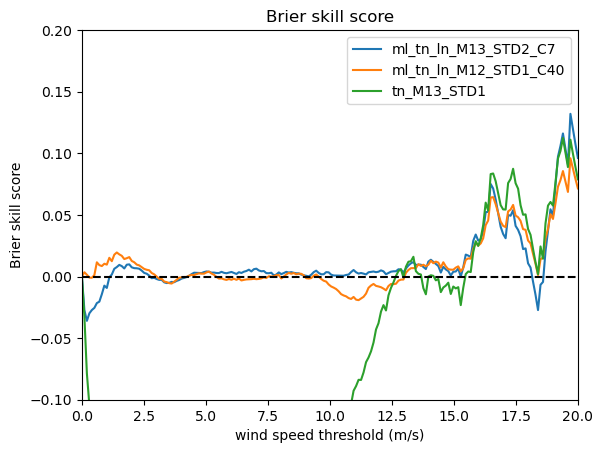

In [70]:
make_brier_skill_plot(base_model, best_models_and_ref, X_test, y_test, values, ylim=ylim)

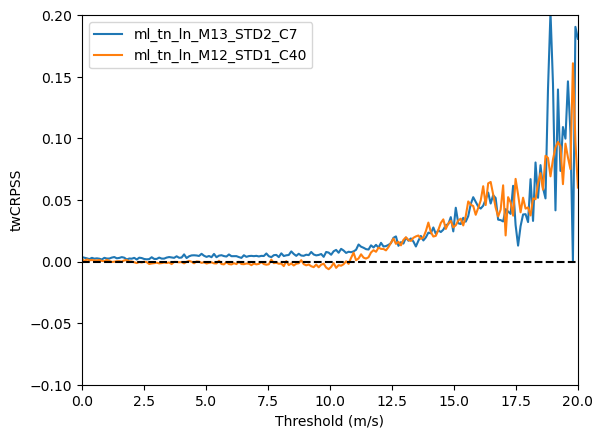

In [12]:
make_twcrpss_plot(base_model, best_models, X_test, y_test, values, ylim=ylim, sample_size=2000)

There are 31 values in the PIT diagram


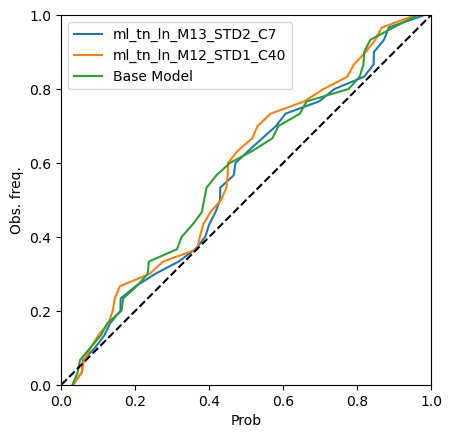

In [14]:
t = 17
make_cpit_diagram_emos(best_models, X_test, y_test, t=t, base_model=base_model)

In general the base model seems to be the most reliable for wind speeds that have a high probability of exceeding a high threshold.

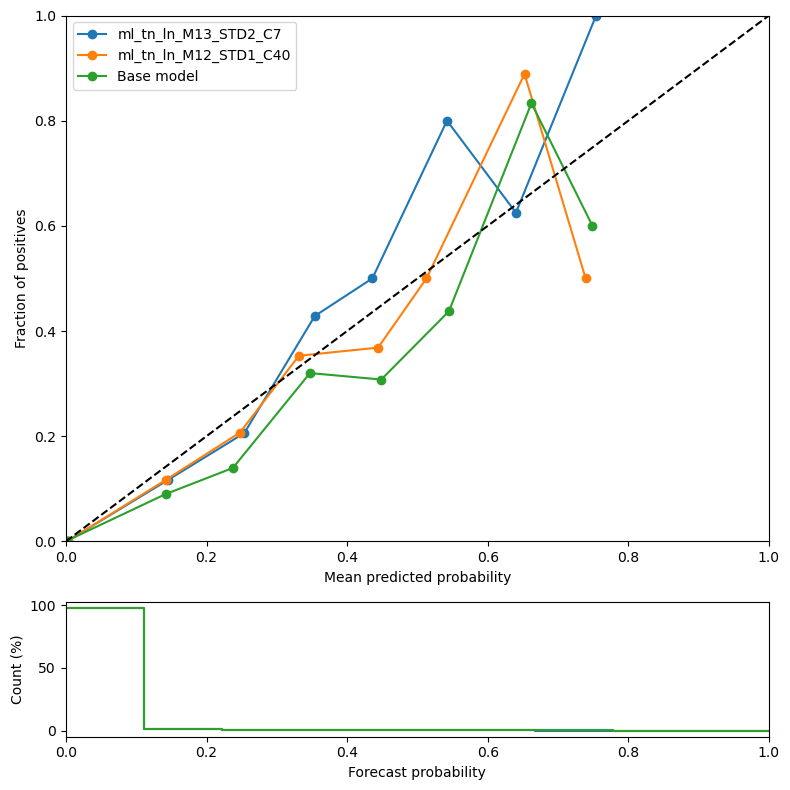

In [17]:
t = 16
make_reliability_and_sharpness(best_models, X_test, y_test, t, base_model=base_model)

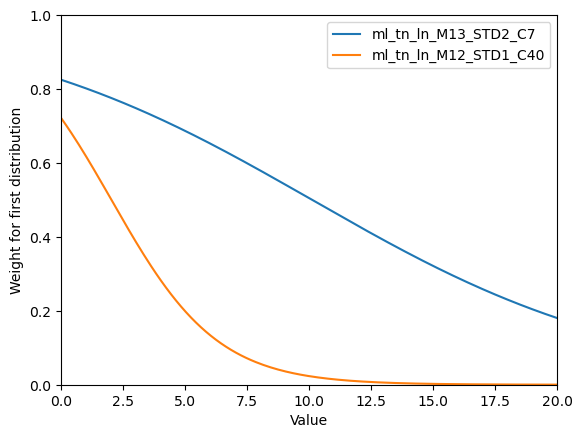

In [73]:
plot_weight_mixture(best_models, values)

However, changing the hyperparameters would very often lead to similar results. 

Regarding replicating these results, I trained the same models with random initialization (denoted by R):

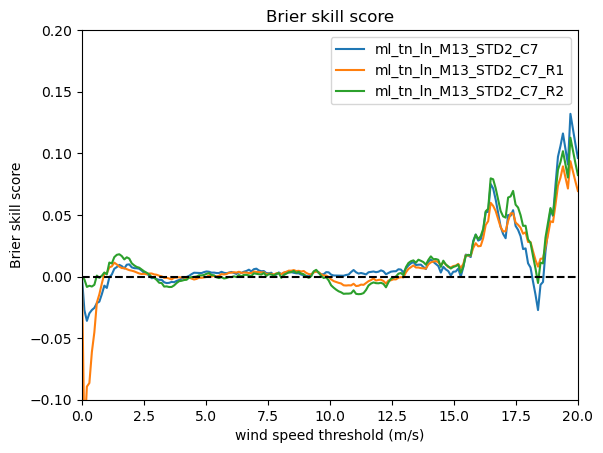

In [81]:
make_brier_skill_plot(base_model, best_models_1, X_test, y_test, values, ylim=ylim)

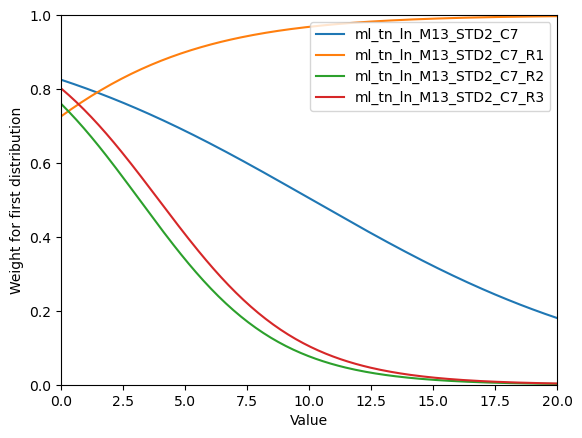

In [85]:
plot_weight_mixture(best_models_1, values)

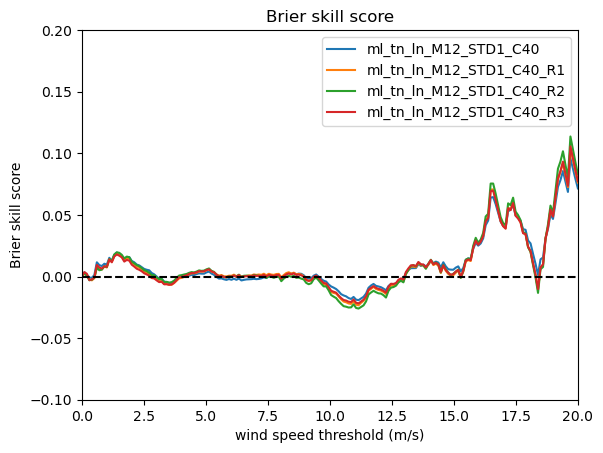

In [89]:
make_brier_skill_plot(base_model, best_models_2, X_test, y_test, values, ylim=ylim)

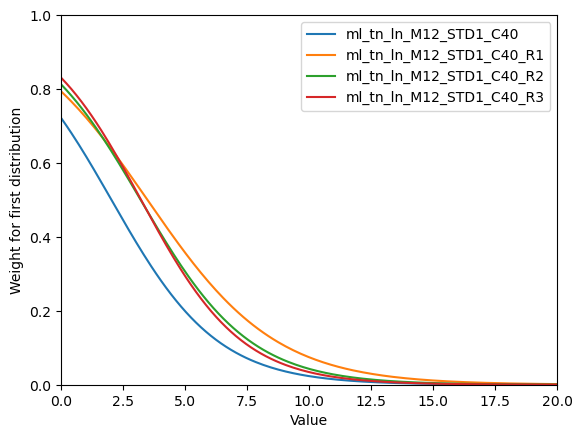

In [88]:
plot_weight_mixture(best_models_2, values)

One important observation is that the use of weighted scoring rule gives the best increase in performance.

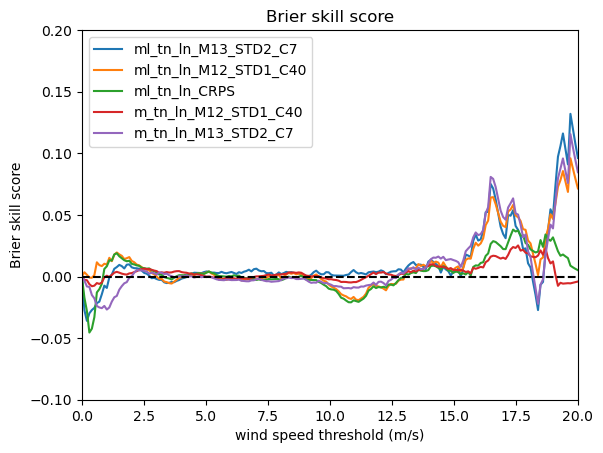

In [12]:
values = np.linspace(0, 20, 200)
ylim = [-0.1, 0.2]

make_brier_skill_plot(base_model, model_comparison, X_test, y_test, values, ylim=ylim)

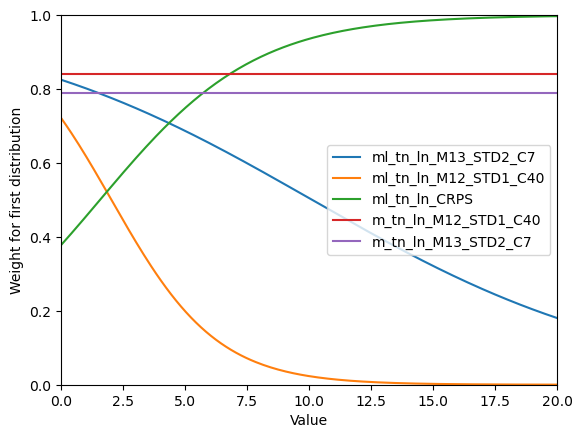

In [13]:
plot_weight_mixture(model_comparison, values)

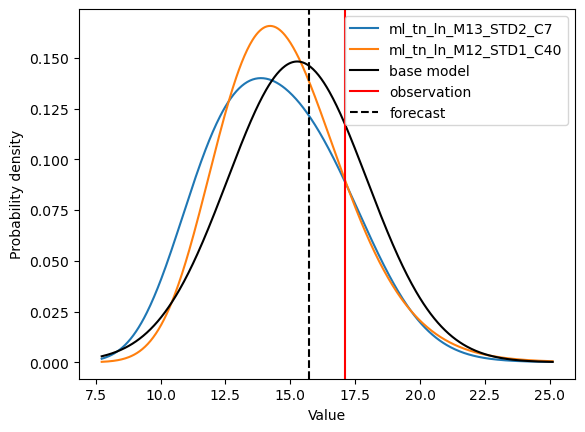

In [ ]:
observation_value = 17
plot_forecast_pdf(best_models, X_test, y_test, observation_value=observation_value, plot_size=8, base_model=base_model)

## ML_TN_GEV Distribution

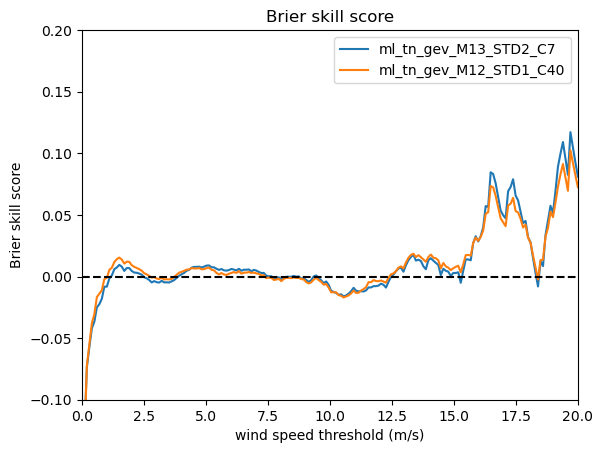

In [17]:
make_brier_skill_plot(base_model, other_models, X_test, y_test, values, ylim=ylim)

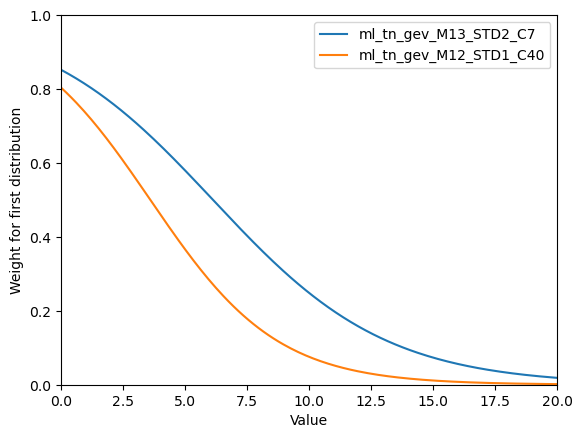

In [18]:
plot_weight_mixture(other_models, values)

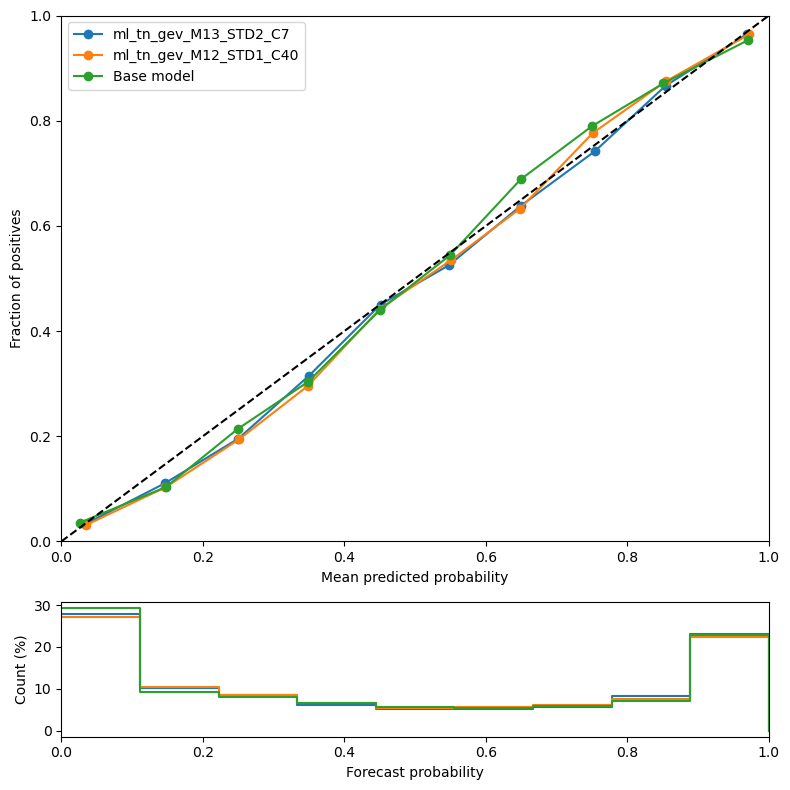

In [34]:
t = 5
make_reliability_and_sharpness(other_models, X_test, y_test, t=t, base_model=base_model)

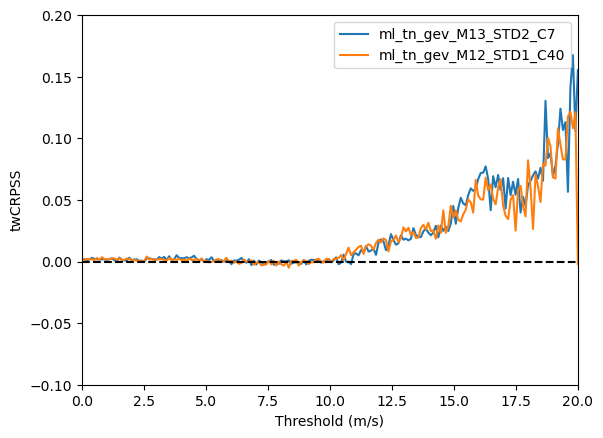

In [23]:
values = np.linspace(0, 20, 200)
ylim = [-0.1, 0.2]
make_twcrpss_plot(base_model, other_models, X_test, y_test, values, ylim=ylim)

Other work I did:

Started working on the implementation of neural networks and read about Bayesian optimization and bootstrapping. Currently, neural networks are not able to get much better results compared to linear regression. However, I have not studied the results extensively, except for looking at the CRPS of the models. The CRPS of neural networks is slightly lower compared to linear regression. Overfitting seems to be a problem, my current idea is to use l1/l2 regularization and set the number of epochs as a hyperparameter, that way we can also utilize early stopping.

## My current plan:

- Implement neural networks with different architectures and the ability to train on different scoring rules and use TN, LN, GEV and mixture as forecast distributions.

- Do the same for convolutional neural networks (where we only take the convolutions over the wind speed forecasts).

- Make sure that we can compare linear regression with neural networks (they currently use different data types).

- The discussion of scoring method might be best to discuss and the next meeting (probably in 1/2 weeks) with the four of us?

- Implement Bayesian optimization with a specific scoring method to find best linear regression and neural network models. Ask Katharina how she did the training/validation.

- Implement bootstrapping to find a best set of hyperparameters for neural networks.

- Optionally: using grid data for other variables.

- Currently the training time of neural networks is relatively quick (faster than for EMOS with linear regression). I do not know whether using a better computer is necessary.

- Ask Katharina about the climatology and implement this.




